#  Anomaly Detection in a Blockchain - EDA

## Step 1: Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import countplot
from matplotlib.pyplot import figure, show
from scipy import stats
import warnings
import gc
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Blockchain.csv')

In [3]:
df

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...
2916692,0,0.111111,1,0,1,1.255809e+09,white
2916693,0,1.000000,1,0,1,4.409699e+07,white
2916694,2,12.000000,6,6,35,2.398267e+09,white
2916695,0,0.500000,1,0,1,1.780427e+08,white


## Step 2: Data Understanding

In [4]:
df.head()

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,100050000.0,princetonCerber
1,44,0.000244,1,0,1,100000000.0,princetonLocky
2,0,1.000000,1,0,2,200000000.0,princetonCerber
3,72,0.003906,1,0,2,71200000.0,princetonCerber
4,144,0.072848,456,0,1,200000000.0,princetonLocky


In [5]:
df.shape

(2916697, 7)

In [6]:
df.describe()

,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   length     int64  
 1   weight     float64
 2   count      int64  
 3   looped     int64  
 4   neighbors  int64  
 5   income     float64
 6   label      object 
dtypes: float64(2), int64(4), object(1)
memory usage: 155.8+ MB


In [8]:
df.nunique()

length            73
weight        784927
count          11572
looped         10168
neighbors        814
income       1866365
label             29
dtype: int64

In [9]:
df.isnull().sum()

length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [10]:
df.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label'], dtype='object')

In [11]:
# Count the occurrences in the "label" column
label_counts = df['label'].value_counts()

# Display the counts
print("Label Counts:")
print(label_counts)

Label Counts:
label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
padua

## Step 5: Co-relation matrix

In [44]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

ValueError: could not convert string to float: 'princetonCerber'

In [45]:
# Create a heatmap
plt.figure(figsize=(7,5))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 700x500 with 0 Axes>

## Step 4: Data Visulaization

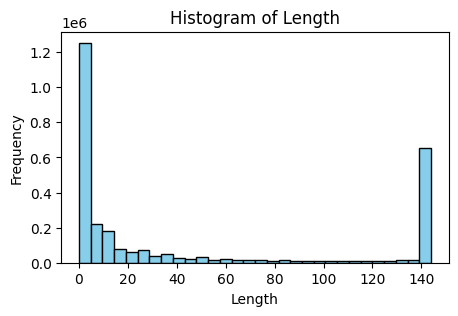

In [15]:
# Plot a histogram of the 'length' column
plt.figure(figsize=(5, 3))
plt.hist(df['length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

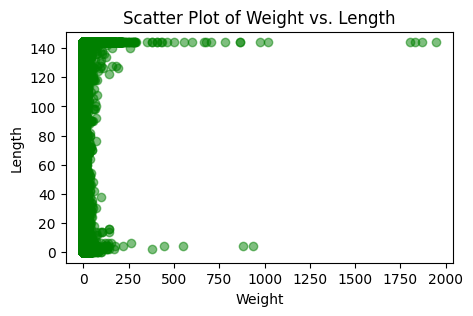

In [16]:
# Plot a scatter plot of 'weight' vs. 'length'
plt.figure(figsize=(5, 3))
plt.scatter(df['weight'], df['length'], alpha=0.5, c='green')
plt.title('Scatter Plot of Weight vs. Length')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

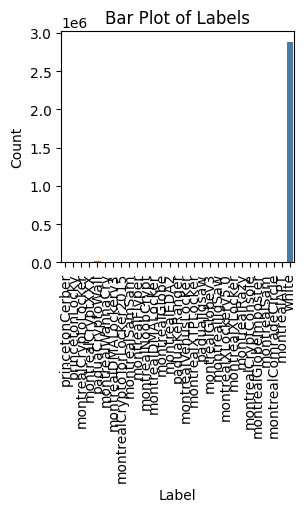

In [17]:
# Create a bar plot for the 'label' column
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='label', palette='Set1')
plt.title('Bar Plot of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

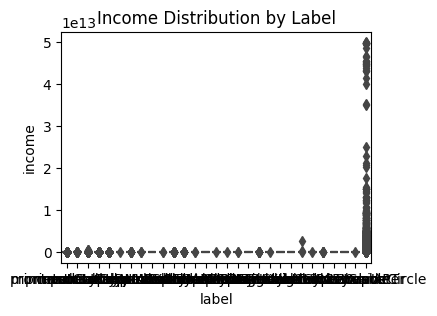

In [18]:
# Boxplot of 'income' for each 'label'
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='label', y='income')
plt.title('Income Distribution by Label')
plt.xticks(rotation=0)
plt.show()

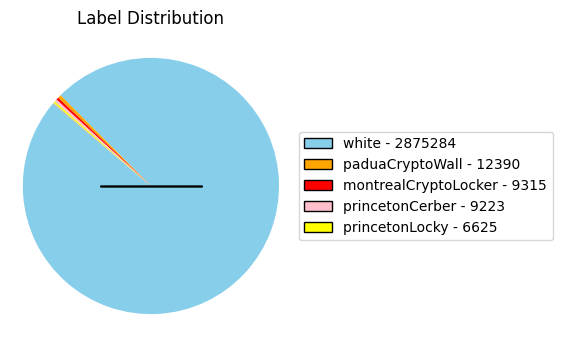

In [43]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Define colors for the pie chart
colors = ['skyblue', 'orange', 'red', 'pink', 'yellow']  # Define your desired colors

# Create a pie chart
plt.figure(figsize=(8, 4))

# Plot the pie chart on the right side
plt.subplot(121)
plt.pie(label_counts, labels=['']*len(label_counts), startangle=140, colors=colors)
plt.title('Percentage of Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Create labels on the left side

for i, color in enumerate(colors):
    plt.bar(0, 0, color=color, label=f'{labels[i]} - {label_counts[i]}', edgecolor='black')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Label Distribution')

plt.show()


## Conclusion
    In this EDA, I have explored a large dataset containing almost 2.9 million rows and various features, including address, year, day, length, weight, count, looped, neighbors, income, label, and transaction type. Notably, I found that 41,000 ransomware transactions out of a total of 2.9 million transactions, this accounts for approximately 1.4% of all transactions. This EDA provides a foundation for the upcoming machine learning phase, where I will construct and train a model 
    for further analysis and decision-making.
    
    Since the model is very imbalance we need to go for Random Oversampling and Random Undersampling